<a href="https://colab.research.google.com/github/CHERUKURU-CHERISHMA/Sentiment-Analysis/blob/main/Slash_Mark_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Create the `reviews.csv` dataset
import pandas as pd

# Sample review data
data = {
    "review": [
        "I love this product! It's amazing.",
        "This is the worst purchase I've ever made.",
        "I am very satisfied with the service.",
        "The quality is terrible and the product broke after a week.",
        "Excellent customer support and great quality.",
        "Not worth the money. I'm very disappointed.",
        "Fantastic experience! Will buy again.",
        "The product arrived late and was damaged.",
        "Very happy with my purchase. Highly recommend!",
        "Horrible experience. Will never buy from this company again.",
        "The product is okay, not the best I've used.",
        "Good value for the price. I'm satisfied.",
        "The item did not match the description. Very misleading.",
        "Overall, I'm quite pleased with the purchase.",
        "Terrible customer service and poor quality."
    ],
    "sentiment": [
        "positive",
        "negative",
        "positive",
        "negative",
        "positive",
        "negative",
        "positive",
        "negative",
        "positive",
        "negative",
        "neutral",
        "positive",
        "negative",
        "positive",
        "negative"
    ]
}

# Convert to DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv('reviews.csv', index=False)




In [ ]:
# Step 2: Load and preprocess the data
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Load dataset
df = pd.read_csv('reviews.csv')

# Preprocess the data
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize and lemmatize
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha()]
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['processed_review'] = df['review'].apply(preprocess_text)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_review']).toarray()
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0 if x == 'negative' else -1).values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.3333333333333333
Confusion Matrix:
 [[0 1]
 [1 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



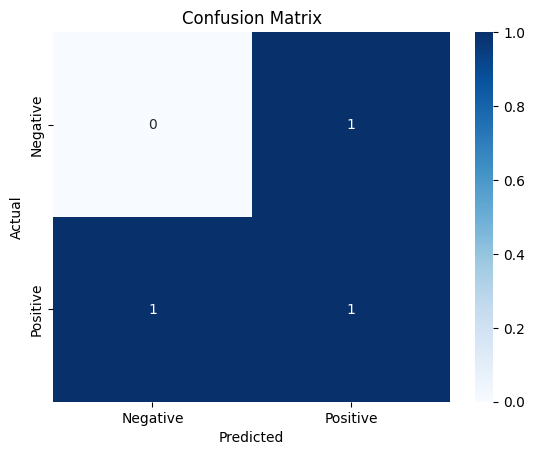

In [ ]:
# Step 3: Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Step 4: Predict sentiments for all reviews in the dataset
y_all_pred = model.predict(X)

# Map the numeric predictions back to sentiment labels
sentiment_map = {1: 'positive', 0: 'negative', -1: 'neutral'}
df['predicted_sentiment'] = y_all_pred
df['predicted_sentiment'] = df['predicted_sentiment'].map(sentiment_map)

# Create a DataFrame to display the reviews with their predicted sentiments
result_table = df[['review', 'predicted_sentiment']]

# Display the DataFrame
print(result_table)

# Save the result table to a CSV file
result_table.to_csv('predicted_sentiments.csv', index=False)

# Optional: Display the result table for verification
import pandas as pd

# Read the CSV to verify results
result_df = pd.read_csv('predicted_sentiments.csv')
print(result_df)

                                               review predicted_sentiment
0                  I love this product! It's amazing.            negative
1          This is the worst purchase I've ever made.            negative
2               I am very satisfied with the service.            positive
3   The quality is terrible and the product broke ...            negative
4       Excellent customer support and great quality.            positive
5         Not worth the money. I'm very disappointed.            negative
6               Fantastic experience! Will buy again.            positive
7           The product arrived late and was damaged.            negative
8      Very happy with my purchase. Highly recommend!            positive
9   Horrible experience. Will never buy from this ...            positive
10       The product is okay, not the best I've used.            negative
11           Good value for the price. I'm satisfied.            positive
12  The item did not match the descrip